In [1]:
!pip install git+https://github.com/huggingface/transformers
!pip install qwen-vl-utils
!pip install flash-attn --no-build-isolation
!pip install openai

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-69yynzb0
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-69yynzb0
  Resolved https://github.com/huggingface/transformers to commit 006d9249ec0270ff6c4d3840979d23fe94bdc763
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import json
import random
from PIL import Image, ImageDraw, ImageFont
from openai import OpenAI
import os
import base64

In [3]:
def inference(image_path, prompt, sys_prompt="You are a helpful assistant.", max_new_tokens=4096, return_input=False):
    image = Image.open(image_path)
    image_local_path = "file://" + image_path
    messages = [
        {"role": "system", "content": sys_prompt},
        {"role": "user", "content": [
            {"type" : "text", "text" : prompt},
            {"image" : image_local_path},
        ]},
    ]
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    print("text :", text)

    inputs = processor(text=[text], images=[image], padding=True, return_tensors="pt")
    inputs = inputs.to('cuda')

    output_ids = model.generate(**inputs, max_new_tokens=max_new_tokens)
    generated_ids = [output_ids[len(input_ids):] for input_ids, output_ids in zip(inputs.input_ids, output_ids)]
    output_text = processor.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)
    if return_input:
        return output_text[0], inputs
    else:
        return output_text[0]

In [4]:
def encoder_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [6]:
import torch
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor
model_path = "Qwen/Qwen2.5-VL-7B-Instruct"
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(model_path, torch_dtype=torch.bfloat16, attn_implementation="flash_attention_2",device_map="auto")
processor = AutoProcessor.from_pretrained(model_path)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

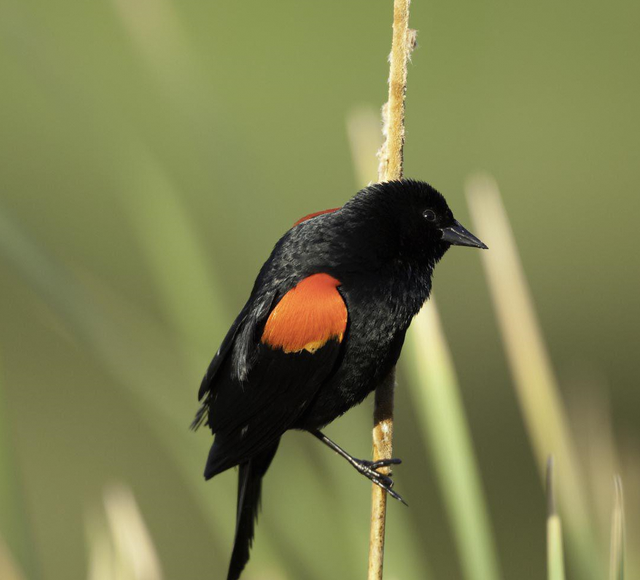

text : <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
What kind of bird is this? Please give its name in Korean and English.<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant

The bird in the picture is a Red-winged Blackbird. In Korean, it is called "빨간가슴까마귀" (Ppallanggasamkkamgeuri), which translates to "Red-winged Blackbird."


In [7]:
image_path = "unireco_bird_example.jpg"
prompt = "What kind of bird is this? Please give its name in Korean and English."

image = Image.open(image_path)
image.thumbnail([640,640], Image.Resampling.LANCZOS)
display(image)

response = inference(image_path, prompt)
print(response)

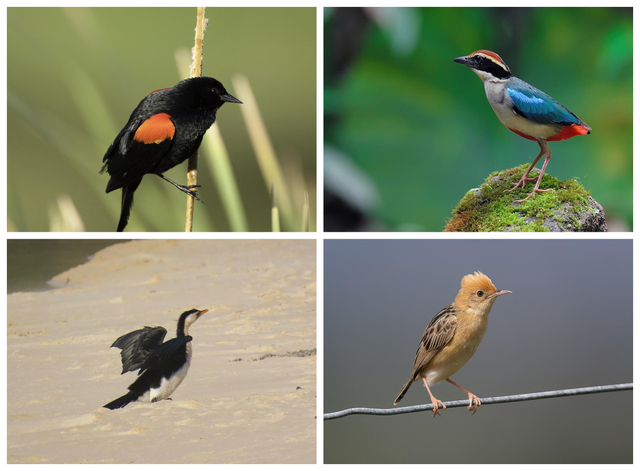

text : <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
What are these birds? Please give their names in English and Korean.<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant

The birds in the images are as follows:

1. **Top Left**: This bird is a Red-winged Blackbird (Euphagus cyanocephalus). In Korean, it is called "빨간가슴까마귀" (Ppallanggasamkkamgeui).

2. **Top Right**: This bird is a Blue-winged Pitta (Pitta brachyura). In Korean, it is called "파랑가슴비둘기" (Paranggasambeolduki).

3. **Bottom Left**: This bird is a Little Pied Cormorant (Microcarbo melanoleucos). In Korean, it is called "소오리새" (Sooori-sae).

4. **Bottom Right**: This bird is a Spotted Cisticola (Cisticola juncidis). In Korean, it is called "점박이새" (Jeumbakije).

These are the common names for each bird in both English and Korean.


In [9]:
image_path = "unireco_birds_example.jpg"
prompt = "What are these birds? Please give their names in English and Korean."

image = Image.open(image_path)
image.thumbnail([640,640], Image.Resampling.LANCZOS)
display(image)

## Use a local HuggingFace model to inference.
response = inference(image_path, prompt)
print(response)

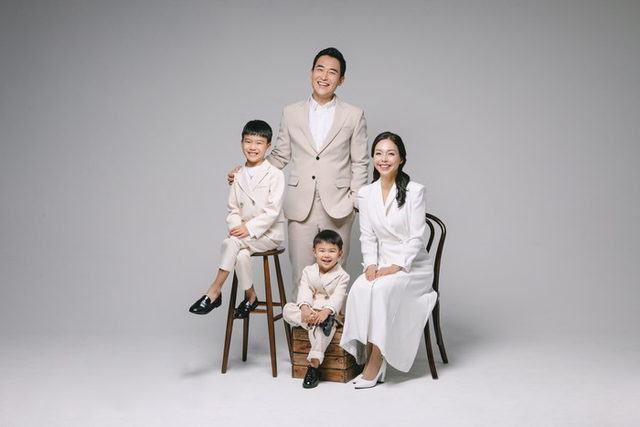

text : <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
What is this picture? How many people are in this picture?<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant

This picture shows a family of four posing for a photograph. There are two adults and two children. The adults appear to be the parents, and the children are likely their sons. They are dressed in matching outfits, which gives the photo a coordinated and formal appearance.


In [12]:
image_path = "fam.jpg"
prompt = "What is this picture? How many people are in this picture?"

image = Image.open(image_path)
image.thumbnail([640,640], Image.Resampling.LANCZOS)
display(image)

## Use a local HuggingFace model to inference.
response = inference(image_path, prompt)
print(response)

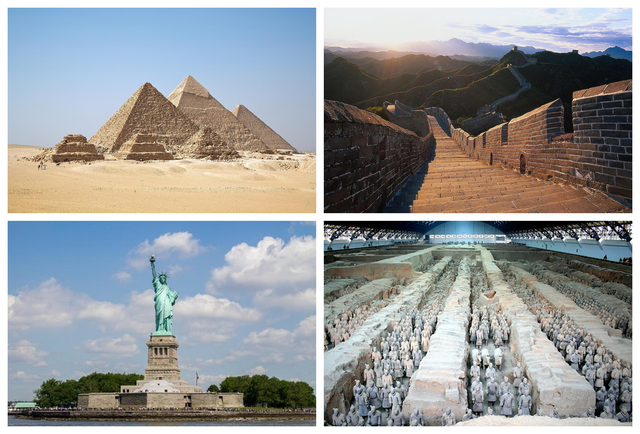

text : <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
What are these attractions? Please give their names in English and Korean. Also, Describe it for me about that place.<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant

The images you've provided showcase four of the most iconic landmarks from around the world:

1. **Pyramids of Giza (Egypt)**
   - **English Name:** Pyramids of Giza
   - **Korean Name:** 기자의 피라미드 (Gijjeoje Piramidi)
   - **Description:** The Pyramids of Giza are a group of monumental pyramids located on the Giza Plateau in Egypt. They were built as tombs for the Pharaohs Khufu, Khafre, and Menkaure during the Old Kingdom period of ancient Egypt. The largest pyramid, the Pyramid of Khufu, is the oldest and largest of the three and is one of the Seven Wonders of the Ancient World.

2. **Great Wall of China (China)**
   - **English Name:** Great Wall of China
   - **Korean Name:** 중국의 장성 (Chungguk-ui Jangseong)
   - 

In [13]:
image_path = "unireco_landmarks_example.jpg"
prompt = "What are these attractions? Please give their names in English and Korean. Also, Describe it for me about that place."

image = Image.open(image_path)
image.thumbnail([640,640], Image.Resampling.LANCZOS)
display(image)

## Use a local HuggingFace model to inference.
response = inference(image_path, prompt)
print(response)

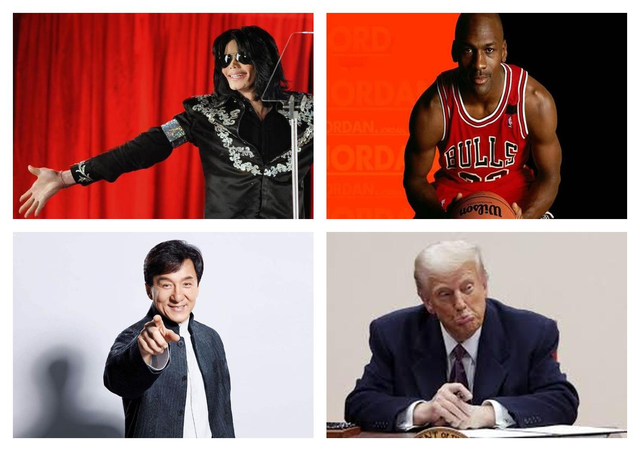

text : <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
Who are these in this picture? Please give their names in English and Korean. Also, Can you explain to me what is their job or, What did they do?<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant

The individuals in the picture are:

1. Michael Jackson (마이클 잭슨)
   - Job: Singer, dancer, and entertainer.
   - Description: Michael Jackson was an American singer, songwriter, record producer, dancer, and actor who became one of the most influential and successful musicians of all time. He is known for his innovative dance moves, distinctive vocal style, and groundbreaking music videos.

2. Michael Jordan (마이클 조던)
   - Job: Professional basketball player.
   - Description: Michael Jordan was an American professional basketball player who played 15 seasons in the National Basketball Association (NBA). He is widely regarded as one of the greatest basketball players of all time and is con

In [15]:
image_path = "unireco_celebrities_example.jpg"
prompt = "Who are these in this picture? Please give their names in English and Korean. Also, Can you explain to me what is their job or, What did they do?"

image = Image.open(image_path)
image.thumbnail([640,640], Image.Resampling.LANCZOS)
display(image)

## Use a local HuggingFace model to inference.
response = inference(image_path, prompt)
print(response)